In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import folium
from folium.plugins import HeatMap
import requests
import geopandas as gpd


In [2]:
fichier = '/Users/aurelienbrame/Desktop/Projet Mobilité/Mobilité/Data/Accidents/accidentsVelo-full.csv'
data = pd.read_csv(fichier)
data.head()


/var/folders/jg/x3y4bp6n6071zs7rycbnfsyc0000gn/T/ipykernel_33757/3598334980.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(fichier)


,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules,_infos_commune.code_epci
0,200500000030,2005-01-13,2005,janvier,jeudi,19:45,62,62331,50.300,2.840,...,0,0.0,2.0,8.0,11.0,200500000030B02,18,17,1.0,200033579.0
1,200500000034,2005-01-19,2005,janvier,mercredi,10:45,62,62022,0.000,0.000,...,0,0.0,2.0,1.0,1.0,200500000034B02,10,15,1.0,200018083.0
2,200500000078,2005-01-26,2005,janvier,mercredi,13:15,02,02173,0.000,0.000,...,2,0.0,2.0,1.0,1.0,200500000078B02,7,15,1.0,200071785.0
3,200500000093,2005-01-03,2005,janvier,lundi,13:30,02,02810,49.255,3.094,...,0,0.0,2.0,3.0,21.0,200500000093B02,7,21,1.0,200071991.0
4,200500000170,2005-01-29,2005,janvier,samedi,18:30,76,76196,0.000,0.000,...,9,0.0,2.0,4.0,2.0,200500000170A01,10,2,1.0,200084952.0


In [4]:
data.columns


Index(['Num_Acc', 'date', 'an', 'mois', 'jour', 'hrmn', 'dep', 'com', 'lat',
       'long', 'agg', 'int', 'col', 'lum', 'atm', 'catr', 'circ', 'nbv',
       'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'grav',
       'sexe', 'age', 'trajet', 'secuexist', 'equipement', 'obs', 'obsm',
       'choc', 'manv', 'vehiculeid', 'typevehicules', 'manoeuvehicules',
       'numVehicules', '_infos_commune.code_epci'],
      dtype='object')

In [3]:
codes_marseille = ['13055', '13001', '13002']

data_marseille = data[data['com'].isin(codes_marseille)].reset_index(drop=True)
data_marseille


,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules,_infos_commune.code_epci
0,200500002439,2005-01-10,2005,janvier,lundi,16:25,13,13055,0.00000,0.00000,...,2,0.0,2.0,1.0,19.0,200500002439B01,7,1,1.0,200054807.0
1,200500002450,2005-01-14,2005,janvier,vendredi,17:30,13,13055,0.00000,0.00000,...,9,0.0,2.0,1.0,1.0,200500002450B01,7,0,1.0,200054807.0
2,200500007120,2005-02-11,2005,février,vendredi,10:00,13,13055,0.00000,0.00000,...,0,14.0,0.0,0.0,0.0,200500007120A01,99,23,1.0,200054807.0
3,200500007157,2005-02-24,2005,février,jeudi,12:30,13,13055,0.00000,0.00000,...,0,0.0,0.0,0.0,12.0,200500007157B01,7,0,1.0,200054807.0
4,200500014401,2005-03-17,2005,mars,jeudi,19:30,13,13055,0.00000,0.00000,...,4,0.0,2.0,5.0,2.0,200500014401B01,10,16,1.0,200054807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,201800008616,2018-02-28,2018,février,mercredi,17:15,13,13055,43.29118,5.38077,...,2,0.0,2.0,7.0,0.0,201800008616A01,7,1,1.0,200054807.0
707,201800008666,2018-03-14,2018,mars,mercredi,12:15,13,13055,43.25265,5.38215,...,2,0.0,2.0,8.0,15.0,201800008666A01,32,1,1.0,200054807.0
708,201800008739,2018-03-26,2018,mars,lundi,22:20,13,13055,43.28753,5.38888,...,9,0.0,2.0,1.0,19.0,201800008739B01,7,7,1.0,200054807.0
709,201800008793,2018-04-04,2018,avril,mercredi,14:00,13,13055,43.30488,5.37323,...,4,0.0,2.0,8.0,2.0,201800008793B01,15,9,1.0,200054807.0


In [4]:
data_marseille_filtred = data_marseille.query('lat != 0 & long != 0').reset_index(drop=True)
data_marseille_filtred


,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules,_infos_commune.code_epci
0,201000020463,2010-01-23,2010,janvier,samedi,18:15,13,13055,43.34210,5.42006,...,4,0.0,2.0,1.0,19.0,201000020463B01,7,15,1.0,200054807.0
1,201000020593,2010-02-22,2010,février,lundi,18:25,13,13055,43.24360,5.38474,...,4,0.0,2.0,7.0,0.0,201000020593B01,7,0,1.0,200054807.0
2,201000020657,2010-02-26,2010,février,vendredi,17:15,13,13055,43.23730,5.36357,...,9,0.0,2.0,1.0,1.0,201000020657B01,7,15,1.0,200054807.0
3,201000022788,2010-01-07,2010,janvier,jeudi,81:5,13,13055,43.27220,5.39133,...,9,0.0,2.0,7.0,19.0,201000022788A01,7,1/23,2.0,200054807.0
4,201100018971,2011-12-24,2011,décembre,samedi,19:00,13,13055,43.29585,5.45789,...,4,11.0,0.0,1.0,1.0,201100018971A01,NaN,NaN,NaN,200054807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,201800008616,2018-02-28,2018,février,mercredi,17:15,13,13055,43.29118,5.38077,...,2,0.0,2.0,7.0,0.0,201800008616A01,7,1,1.0,200054807.0
238,201800008666,2018-03-14,2018,mars,mercredi,12:15,13,13055,43.25265,5.38215,...,2,0.0,2.0,8.0,15.0,201800008666A01,32,1,1.0,200054807.0
239,201800008739,2018-03-26,2018,mars,lundi,22:20,13,13055,43.28753,5.38888,...,9,0.0,2.0,1.0,19.0,201800008739B01,7,7,1.0,200054807.0
240,201800008793,2018-04-04,2018,avril,mercredi,14:00,13,13055,43.30488,5.37323,...,4,0.0,2.0,8.0,2.0,201800008793B01,15,9,1.0,200054807.0


In [7]:
url = "https://photon.komoot.io/api/?q=marseille"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    print(data)
else:
    print("Erreur lors de la requête :", response.status_code)


{'features': [{'geometry': {'coordinates': [5.3699525, 43.2961743], 'type': 'Point'}, 'type': 'Feature', 'properties': {'osm_type': 'R', 'osm_id': 76469, 'extent': [5.2286312, 43.3910329, 5.5324758, 43.1696228], 'country': 'France', 'osm_key': 'place', 'countrycode': 'FR', 'osm_value': 'city', 'postcode': '13000', 'name': 'Marseille', 'county': 'Bouches-du-Rhône', 'state': "Provence-Alpes-Côte d'Azur", 'type': 'city'}}, {'geometry': {'coordinates': [2.5430217, 43.2032679], 'type': 'Point'}, 'type': 'Feature', 'properties': {'osm_type': 'R', 'osm_id': 2415173, 'extent': [2.5124284, 43.229362, 2.5750874, 43.1945559], 'country': 'France', 'osm_key': 'place', 'countrycode': 'FR', 'osm_value': 'village', 'postcode': '11800', 'name': 'Marseillette', 'county': 'Aude', 'state': 'Occitanie', 'type': 'city'}}, {'geometry': {'coordinates': [5.29125253761457, 43.466319], 'type': 'Point'}, 'type': 'Feature', 'properties': {'osm_type': 'R', 'osm_id': 5826733, 'extent': [4.7339173, 43.7721131, 5.8135

In [8]:
data_heatmap = data_marseille_filtred[['lat', 'long']].values.tolist()


In [5]:
gdf_marseille = gpd.GeoDataFrame(
    data_marseille_filtred,
    geometry=gpd.points_from_xy(data_marseille_filtred.long, data_marseille_filtred.lat))

m = folium.Map(location=[43.2961743, 5.3699525],tiles="Cartodb Positron", zoom_start=12)

for _, row in gdf_marseille.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        icon=folium.Icon(color='red', icon='bicycle', prefix='fa', size='small')

    ).add_to(m)

# HeatMap(data_heatmap, opacity = 0).add_to(m)
m


In [10]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=5)  # Changer le nombre de clusters selon vos besoins
# data_marseille_filtred['cluster'] = kmeans.fit_predict(data_marseille_filtred[['lat', 'long']])


In [7]:
fig = px.scatter_mapbox(
    data_marseille_filtred,
    lat='lat',
    lon='long',
    height=600,
    zoom=12,
    color=data_marseille_filtred['grav'],
    mapbox_style="carto-positron",
)

fig.update_layout(
    margin={"r":10,"t":10,"l":10,"b":10}  # Marges droite, haut, gauche, bas à 0
)

fig.show()


In [12]:
fig = px.density_mapbox(
    data_marseille_filtred,
    lat='lat',
    lon='long',
    radius=15,
    height=600,
    zoom=12,
    mapbox_style="carto-darkmatter",
    color_continuous_scale=px.colors.sequential.YlOrBr
)

fig.update_layout(
    margin={"r":10,"t":10,"l":10,"b":10}  # Marges droite, haut, gauche, bas à 0
)

fig.show()


In [14]:
fichier_geojson = '/Users/aurelienbrame/Desktop/Projet Mobilité/Mobilité/Data/Pistes/france-20220710.geojson'

gdf2 = gpd.read_file(fichier_geojson)

%matplotlib inline
gdf2.plot()


In [12]:
gdf2.head()


,id_local,id_osm,num_iti,code_com_d,ame_d,regime_d,sens_d,largeur_d,local_d,statut_d,...,revet_g,access_ame,date_maj,trafic_vit,lumiere,d_service,source,project_c,ref_geo,geometry
0,geovelo_377971705_31254,377971705,None,31254,PISTE CYCLABLE,AUTRE,UNIDIRECTIONNEL,NaN,None,EN SERVICE,...,LISSE,None,2020-08-10,5.0,True,None,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (1.52869 43.53102, 1.52760 43.53166)"
1,geovelo_568517126_24098,568517126,None,24098,PISTE CYCLABLE,AUTRE,UNIDIRECTIONNEL,NaN,None,EN SERVICE,...,None,None,2020-06-04,5.0,None,None,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.72652 45.21236, 0.72615 45.21294..."
2,geovelo_82213402_37214,82213402,None,37214,PISTE CYCLABLE,AUTRE,UNIDIRECTIONNEL,NaN,None,EN SERVICE,...,None,None,2010-10-19,5.0,None,None,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.66715 47.42967, 0.66709 47.42969)"
3,geovelo_38861770_37261,38861770,EV6,37261,VOIE VERTE,AUTRE,UNIDIRECTIONNEL,NaN,None,EN SERVICE,...,None,None,2022-04-07,5.0,None,None,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.69789 47.36713, 0.69797 47.36715)"
4,geovelo_184154243_37208,184154243,None,37208,VOIE VERTE,AUTRE,UNIDIRECTIONNEL,NaN,None,EN SERVICE,...,None,None,2017-02-15,5.0,None,None,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.73012 47.34787, 0.73015 47.34783)"


In [15]:
gdf2.columns


Index(['id_local', 'id_osm', 'num_iti', 'code_com_d', 'ame_d', 'regime_d',
       'sens_d', 'largeur_d', 'local_d', 'statut_d', 'revet_d', 'code_com_g',
       'ame_g', 'regime_g', 'sens_g', 'largeur_g', 'local_g', 'statut_g',
       'revet_g', 'access_ame', 'date_maj', 'trafic_vit', 'lumiere',
       'd_service', 'source', 'project_c', 'ref_geo', 'geometry'],
      dtype='object')

In [13]:
gdf2.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 259030 entries, 0 to 259029
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_local    259030 non-null  object  
 1   id_osm      259030 non-null  object  
 2   num_iti     30594 non-null   object  
 3   code_com_d  258929 non-null  object  
 4   ame_d       259021 non-null  object  
 5   regime_d    221506 non-null  object  
 6   sens_d      258969 non-null  object  
 7   largeur_d   11071 non-null   float64 
 8   local_d     80287 non-null   object  
 9   statut_d    259030 non-null  object  
 10  revet_d     146047 non-null  object  
 11  code_com_g  258925 non-null  object  
 12  ame_g       259030 non-null  object  
 13  regime_g    177430 non-null  object  
 14  sens_g      207286 non-null  object  
 15  largeur_g   10019 non-null   float64 
 16  local_g     78539 non-null   object  
 17  statut_g    259030 non-null  object  
 18  revet_g     1460

<AxesSubplot:>

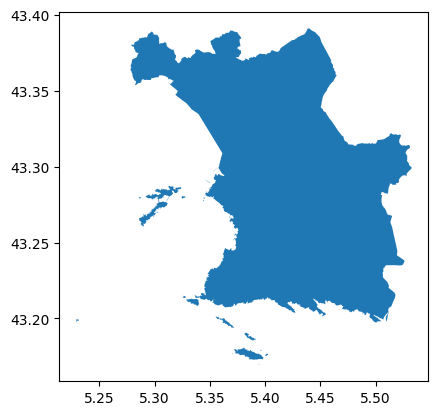

In [14]:
fichier_geojson_limit = '/Users/aurelienbrame/Desktop/Projet Mobilité/Mobilité/Data/Pistes/MARSEILLE.geojson'
limit_mars = gpd.read_file(fichier_geojson_limit)

%matplotlib inline
limit_mars.plot()


In [15]:
from geopandas.tools import overlay


<AxesSubplot:>

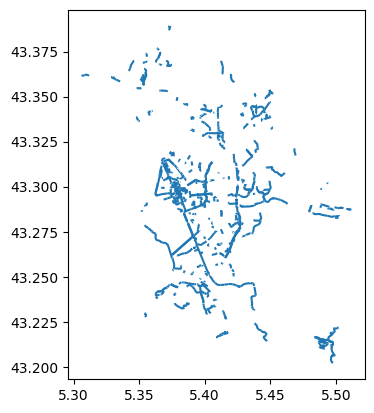

In [17]:
linestrings_in_marseille = overlay(gdf2, limit_mars, how='intersection')
%matplotlib inline
linestrings_in_marseille.plot()


In [23]:
# import plotly.express as px
# import plotly.graph_objects as go

# fig = px.scatter_mapbox(
#     data_marseille_filtred,
#     lat='lat',
#     lon='long',
#     height=600,
#     zoom=12,
#     color=data_marseille_filtred['grav'],
#     mapbox_style="carto-positron",
# )

# fig.update_layout(
#     margin={"r":10,"t":10,"l":10,"b":10}
# )

# for line in linestrings_in_marseille.geometry:
#     lon, lat = line.xy
#     fig.add_trace(
#         go.Scattermapbox(
#             mode = "lines",
#             lon = lon.tolist(),
#             lat = lat.tolist(),
#             line = dict(width = 2, color = 'grey'),
#             opacity = 0.5,
#             showlegend = False,
#         )
#     )

# fig.show()
